# A Recurrent Network Mechanism of Time Integration in Perceptual Decisions
Wong,  Wang
Journal of Neuroscience, January 2006, 26(4):1212-1328

## Material and Methods
### The two-variable network model

### Calling Library Fuctions

In [1]:
# LIBRARY

import numpy as np # vector manipulation
import math  # math functions
import sys

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")


### The Reduced Network Model

In [2]:
def H(x):
    a=270 # Hz/nA
    b=108 # Hz
    d=.154 # seconds
    f=(a*x-b)/(1-np.exp(-d*(a*x-b)))
    return f
x=np.arange(-1,1,0.01)


### Neural Circuit
$$ x_{1}=J_{11}S_1-J_{12}S_2+I_{0}+I_{1}+I_{noise,1}$$
$$ x_{2}=J_{22}S_2-J_{21}S_1+I_{0}+I_{2}+I_{noise,1}$$

where the synaptic couplings are $J_{11}=0.2609$, $J_{22}=0.2609$, $J_{12}=0.0497$ and $J_{21}=0.0497$.
$I_{0}=0.3255 nA$ represents external input 


In [3]:
def total_synaptic_current(S_1,S_2,I_1,I_2,I_noise_1,I_noise_2):
    # Synaptic coupling
    J_11=0.2609 # nA
    J_22=0.2609 # nA
    J_12=0.0497 # nA
    J_21=0.0497 # nA
    I_0=0.3255  # nA
    x_1=J_11*S_1-J_12*S_2+I_0+I_1+I_noise_1
    x_2=J_22*S_2-J_21*S_1+I_0+I_2+I_noise_2
    return x_1, x_2


### Background activity
$$ \tau_{AMPA}\frac{d I_{noise,i}(t)}{dt} =-I_{noise,i}(t)+\eta_i(t)\sqrt{\tau_{AMPA}}\sigma_{noise}$$

In [4]:
def Background_Activity(I_noise):
    h=0.1
    sigma_noise=0.02 # nA
    tau_AMPA=2 #ms
    eta_noise=np.random.normal(0,1,1)
    k=0#(-(I_noise)+eta_noise*np.sqrt(tau_AMPA)*sigma_noise)
    I_noise_new=I_noise+h/tau_AMPA*(-(I_noise+h/2*k)+eta_noise
                                *np.sqrt(tau_AMPA)*sigma_noise)
    return I_noise_new

### Network Dynamics
$$ \frac{d S_{i}}{dt} =-\frac{S_{i}}{\tau_S}+(1-S_{i})\gamma H_{i}$$

In [5]:
def Network_Dynamics_VIS(S,x):
    h=0.1/1000 #ms
    gamma=0.641
    tau_S=.100 #s
    k=(-S/tau_S+(1-S)*gamma*H(x)/1)
    S_new=S+h*(-(S+h/2*k)/tau_S+(1-S+h/2*k)*gamma*H(x))
    return S_new

def Network_Dynamics_VEST(S,x,tau_VEST):
    h=0.1/1000 #ms
    gamma=0.641
    #tau_S=.10 #s
    k=(-S/tau_VEST+(1-S)*gamma*H(x)/1)
    S_new=S+h*(-(S+h/2*k)/tau_VEST+(1-S+h/2*k)*gamma*H(x))
    return S_new







### Input Current Target

$$ I_i=J_{A,ext}\mu_0\left(1+ \frac{c'}{100} \right) $$


In [6]:
def I_input_1(c_dash):
    J_A_ext=5.2/10000 # nA/Hz
    mu_0=30 # Hz
    I_motion=J_A_ext*mu_0*(1+(c_dash)/100)
    return I_motion

$$ I_2=J_{A,ext}\mu_0\left(1- \frac{c'}{100} \right) $$

In [7]:
def I_input_2(c_dash):
    J_A_ext=0.00052 # nA/Hz
    mu_0=30 # Hz
    I_motion=J_A_ext*mu_0*(1-(c_dash)/100)
    return I_motion

        
def Reaction_Time(Firing_Rate_1,Firing_Rate_2,Threshold,time):
    ANSWER=0
    RT=0
    count=0
    if Firing_Rate_1 >=Threshold: 
        ANSWER=1
        RT=time
        count=1
    elif Firing_Rate_2 >=Threshold:
        ANSWER=0
        RT=time
        count=1
    return ANSWER,RT,count

def Reaction_TimeEND(Firing_Rate_1,Firing_Rate_2,Threshold,time):
    ANSWER=0
    RT=0
    count=0
    if Firing_Rate_1 >=Firing_Rate_2: 
        ANSWER=1
        RT=time
        count=1
    else:
        ANSWER=0
        RT=time
        count=1
    return ANSWER,RT,count

In [8]:
h=0.1
time=np.arange(-100,1500,h)
J_A_ext=0.00052 # nA/Hz
mu_0=30 # Hz
Vector_coherence=[1.0,3.0,5.0]#,7.5,10.0,15.0]
Vector_coherence=[5.0]#,7.5,10.0,15.0]

TAU_VEST=np.arange(0.07,0.11,0.001)#Vector_coherence=[1.0,3.0,5.0]
#TAU_VEST=0.1

Threshold=15
N=1000
RT_VEST_coh_hit=np.zeros(len(Vector_coherence))
RT_VEST_coh_miss=np.zeros(len(Vector_coherence))
Prob_VEST=np.zeros(len(Vector_coherence))
RT_VIS_coh_hit=np.zeros(len(Vector_coherence))
RT_VIS_coh_miss=np.zeros(len(Vector_coherence))
Prob_VIS=np.zeros(len(Vector_coherence))

#fig = plt.figure(figsize=(12,8))

ALL_F_1=0.2*np.ones((N,len(time)))
ALL_F_2=0.2*np.ones((N,len(time)))
I_1=0.0*np.ones(len(time)) # np.zeros((1,len(time)))
I_2=0.0*np.ones(len(time)) # np.zeros((1,len(time)))
Firing_target_1=0*time # np.zeros((1,len(time)))
Firing_target_2=0*time # np.zeros((1,len(time)))
Firing_target_3=0*time # np.zeros((1,len(time)))
Firing_target_4=0*time # np.zeros((1,len(time)))

In [9]:
RT_VEST_coh_hit=[]
RT_VEST_coh_miss=[]#np.zeros(len(Vector_coherence))
Prob_VEST=[]#np.zeros(len(Vector_coherence))
RT_VIS_coh_hit=[]#np.zeros(len(Vector_coherence))
RT_VIS_coh_miss=[]#np.zeros(len(Vector_coherence))
Prob_VIS=[]#np.zeros(len(Vector_coherence))


j=0
#for j in range(0,len(Vector_coherence)):
for k in range(0,len(TAU_VEST)):
  
    ANSWER_VIS=np.zeros(N)
    RT_VIS=np.zeros(N)
    ANSWER_VEST=np.zeros(N)
    RT_VEST=np.zeros(N)



    for n in range(0,N):
        if n%500==0:
            print('Tau %0.4f : n: %d' %(TAU_VEST[k],n))
        I_noise_1=0.001*np.random.normal(0,1,len(time))
        I_noise_2=0.001*np.random.normal(0,1,len(time))

        x_1=J_A_ext*mu_0*np.random.uniform(0,1,len(time))
        x_2=J_A_ext*mu_0*np.random.uniform(0,1,len(time))
        x_3=J_A_ext*mu_0*np.random.uniform(0,1,len(time))
        x_4=J_A_ext*mu_0*np.random.uniform(0,1,len(time))


        S_1=0.2*np.ones(len(time))+0.01*np.random.normal(0,1,len(time))#0.1*np.random.uniform(0,1,len(time))# np.random.normal(0,1,len(time))*0.0004
        S_2=0.2*np.ones(len(time))+0.01*np.random.normal(0,1,len(time)) #0.1*np.random.uniform(0,1,len(time)) #np.random.normal(0,1,len(time))*0.0004
        S_3=0.2*np.ones(len(time))+0.01*np.random.normal(0,1,len(time))#0.1*np.random.uniform(0,1,len(time))# np.random.normal(0,1,len(time))*0.0004
        S_4=0.2*np.ones(len(time))+0.01*np.random.normal(0,1,len(time)) #0.1*np.random.uniform(0,1,len(time)) #np.random.normal(0,1,len(time))*0.0004


 

        Firing_target_1[0]=H(x_1[0])
        Firing_target_2[0]=H(x_2[0])
        Firing_target_3[0]=H(x_1[0])
        Firing_target_4[0]=H(x_2[0])



        count=0
        count2=0
        for i in range (0,len(time)-1):
            if time[i] >=0 and time[i]<1000:
                c_dash=Vector_coherence[j]
            else:
                c_dash=0.0

        
            I_noise_1[i+1]=Background_Activity(I_noise_1[i])
            I_noise_2[i+1]=Background_Activity(I_noise_2[i])

            I_1[i+1]=I_input_1(c_dash)
            I_2[i+1]=I_input_1(-c_dash)

            x_1[i+1],x_2[i+1]=total_synaptic_current(S_1[i],S_2[i],I_1[i],I_2[i],I_noise_1[i],I_noise_2[i])
            S_1[i+1]=Network_Dynamics_VIS(S_1[i],x_1[i+1])
            S_2[i+1]=Network_Dynamics_VIS(S_2[i],x_2[i+1])
            Firing_target_1[i]=H(x_1[i])
            Firing_target_2[i]=H(x_2[i])
            I_noise_1[i+1]=Background_Activity(I_noise_1[i])
            I_noise_2[i+1]=Background_Activity(I_noise_2[i])

 
            x_3[i+1],x_4[i+1]=total_synaptic_current(S_3[i],S_4[i],I_1[i],I_2[i],I_noise_1[i],I_noise_2[i])
            S_3[i+1]=Network_Dynamics_VEST(S_3[i],x_3[i+1],TAU_VEST[k])
            S_4[i+1]=Network_Dynamics_VEST(S_4[i],x_4[i+1],TAU_VEST[k])
            Firing_target_3[i]=H(x_3[i])
            Firing_target_4[i]=H(x_4[i])
            if count <0.5:
                ANSWER_VIS[n],RT_VIS[n],count=Reaction_Time(Firing_target_1[i],Firing_target_2[i],Threshold,time[i])
            if count2 <0.5:
                ANSWER_VEST[n],RT_VEST[n],count2=Reaction_Time(Firing_target_3[i],Firing_target_4[i],Threshold,time[i])
        if count <0.5:
            ANSWER_VIS[n],RT_VIS[n],count=Reaction_TimeEND(Firing_target_1[i],Firing_target_2[i],Threshold,time[i])
        if count2 <0.5:
            ANSWER_VEST[n],RT_VEST[n],count2=Reaction_TimeEND(Firing_target_3[i],Firing_target_4[i],Threshold,time[i])


            
    
    RT_VIS_coh_hit.append(np.average(RT_VIS[ANSWER_VIS==1]))
    RT_VIS_coh_miss.append(np.average(RT_VIS[ANSWER_VIS==0]))
    Prob_VIS.append(np.average(ANSWER_VIS))
    RT_VEST_coh_hit.append(np.average(RT_VEST[ANSWER_VEST==1]))
    RT_VEST_coh_miss.append(np.average(RT_VEST[ANSWER_VEST==0]))
    Prob_VEST.append(np.average(ANSWER_VEST))

Tau 0.0700 : n: 0
Tau 0.0700 : n: 500
Tau 0.0710 : n: 0
Tau 0.0710 : n: 500
Tau 0.0720 : n: 0
Tau 0.0720 : n: 500
Tau 0.0730 : n: 0
Tau 0.0730 : n: 500
Tau 0.0740 : n: 0
Tau 0.0740 : n: 500
Tau 0.0750 : n: 0
Tau 0.0750 : n: 500
Tau 0.0760 : n: 0
Tau 0.0760 : n: 500
Tau 0.0770 : n: 0
Tau 0.0770 : n: 500
Tau 0.0780 : n: 0
Tau 0.0780 : n: 500
Tau 0.0790 : n: 0
Tau 0.0790 : n: 500
Tau 0.0800 : n: 0
Tau 0.0800 : n: 500
Tau 0.0810 : n: 0
Tau 0.0810 : n: 500
Tau 0.0820 : n: 0
Tau 0.0820 : n: 500
Tau 0.0830 : n: 0
Tau 0.0830 : n: 500
Tau 0.0840 : n: 0
Tau 0.0840 : n: 500
Tau 0.0850 : n: 0
Tau 0.0850 : n: 500
Tau 0.0860 : n: 0
Tau 0.0860 : n: 500
Tau 0.0870 : n: 0
Tau 0.0870 : n: 500
Tau 0.0880 : n: 0
Tau 0.0880 : n: 500
Tau 0.0890 : n: 0
Tau 0.0890 : n: 500
Tau 0.0900 : n: 0
Tau 0.0900 : n: 500
Tau 0.0910 : n: 0
Tau 0.0910 : n: 500
Tau 0.0920 : n: 0
Tau 0.0920 : n: 500
Tau 0.0930 : n: 0
Tau 0.0930 : n: 500
Tau 0.0940 : n: 0
Tau 0.0940 : n: 500
Tau 0.0950 : n: 0
Tau 0.0950 : n: 500
Tau 0.0960 :

### Plotting
#### Input

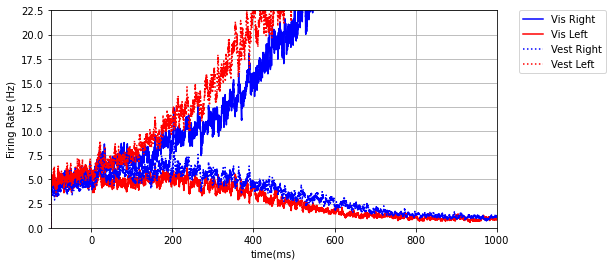

In [10]:
fig = plt.figure(figsize=(8,4))

plt.plot(time,Firing_target_1,'-',color='blue',label="Vis Right")
plt.plot(time,Firing_target_2,'-',color='red',label="Vis Left")
plt.plot(time,Firing_target_3,':',color='blue',label="Vest Right")
plt.plot(time,Firing_target_4,':',color='red',label="Vest Left")

plt.grid()
plt.xlabel('time(ms)')
plt.ylabel('Firing Rate (Hz)')
plt.xlim((-100,1000))
plt.ylim((0,Threshold*1.5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Multisensory_Example_Firing_Pattern.png', bbox_inches='tight',dpi=300)

# plt.
#plt.ylim((30,50))
plt.show()


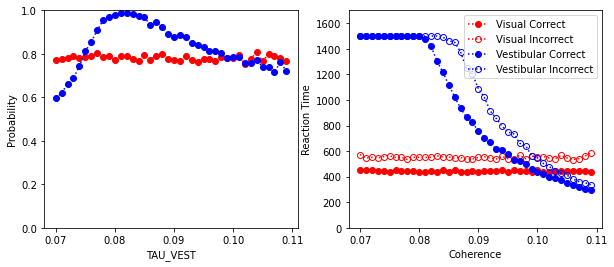

In [11]:
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(TAU_VEST,Prob_VIS,'o:',color='red')
plt.plot(TAU_VEST,Prob_VEST,'o:',color='blue')

plt.xlabel('TAU_VEST')
plt.ylabel('Probability')
plt.ylim(0,1)
plt.subplot(122)
plt.plot((TAU_VEST),RT_VIS_coh_hit,'o:',color='red',label="Visual Correct")
plt.plot((TAU_VEST),RT_VIS_coh_miss,'o:',fillstyle='none',color='red',label="Visual Incorrect")
plt.plot((TAU_VEST),RT_VEST_coh_hit,'o:',color='blue',label="Vestibular Correct")
plt.plot((TAU_VEST),RT_VEST_coh_miss,'o:',fillstyle='none',color='blue',label="Vestibular Incorrect")


plt.legend()
plt.ylim(0,1700)
plt.xlabel('Coherence')
plt.ylabel('Reaction Time')
plt.savefig('Behavioural.png', bbox_inches='tight',dpi=300)
plt.show()

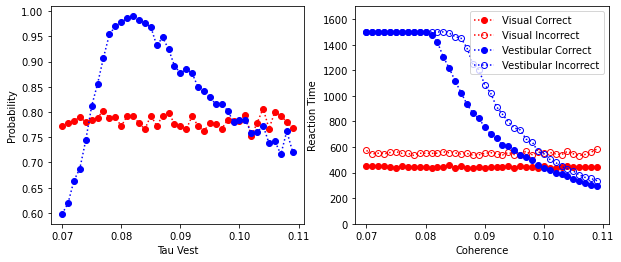

In [12]:
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(TAU_VEST,Prob_VIS,'o:',color='red')
plt.plot(TAU_VEST,Prob_VEST,'o:',color='blue')
#plt.plot(Prob_VIS,'o:',color='red')
#plt.plot(Prob_VEST,'o:',color='blue')
plt.xlabel('Tau Vest')
plt.ylabel('Probability')
#plt.xscale('log')
#plt.ylim(0,1)
plt.subplot(122)
plt.plot(TAU_VEST,RT_VIS_coh_hit,'o:',color='red',label="Visual Correct")
plt.plot(TAU_VEST,RT_VIS_coh_miss,'o:',fillstyle='none',color='red',label="Visual Incorrect")
plt.plot(TAU_VEST,RT_VEST_coh_hit,'o:',color='blue',label="Vestibular Correct")
plt.plot(TAU_VEST,RT_VEST_coh_miss,'o:',fillstyle='none',color='blue',label="Vestibular Incorrect")


#plt.xscale('log')
plt.legend()
plt.ylim(0,1700)
plt.xlabel('Coherence')
plt.ylabel('Reaction Time')
plt.savefig('Tau_Multisensory_Behavioural.png', bbox_inches='tight',dpi=300)
plt.show()